In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.font_manager.fontManager.addfont('/opt/localdata/Data/bea/nlp/bmi550/assignment2/Tinos-Regular.ttf')
mpl.rc('font', family='Tinos')

log_df = pd.read_csv("./sample_size_analysis.csv")
log_df

,test_loss,test_acc,test_auc,test_macro_f1,test_micro_f1,test_prec,test_rec,train_size,iteration
0,1.030293,0.611957,0.675404,0.419658,0.611957,0.611957,0.611957,100,0
1,1.166335,0.576087,0.553325,0.331299,0.576087,0.576087,0.576087,100,1
2,1.261408,0.581522,0.615074,0.341329,0.581522,0.581522,0.581522,100,2
3,1.157204,0.595652,0.706910,0.367578,0.595652,0.595652,0.595652,100,3
4,1.013748,0.583696,0.624756,0.330159,0.583696,0.583696,0.583696,100,4
...,...,...,...,...,...,...,...,...,...
125,1.215976,0.642391,0.776471,0.558607,0.642391,0.642391,0.642391,700,5
126,0.963905,0.644565,0.786515,0.553995,0.644565,0.644565,0.644565,700,6
127,0.956713,0.651087,0.795379,0.539632,0.651087,0.651087,0.651087,700,7
128,1.260873,0.644565,0.782255,0.562757,0.644565,0.644565,0.644565,700,8


In [26]:
col_list = sns.color_palette("husl", as_cmap=False)
col_list

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

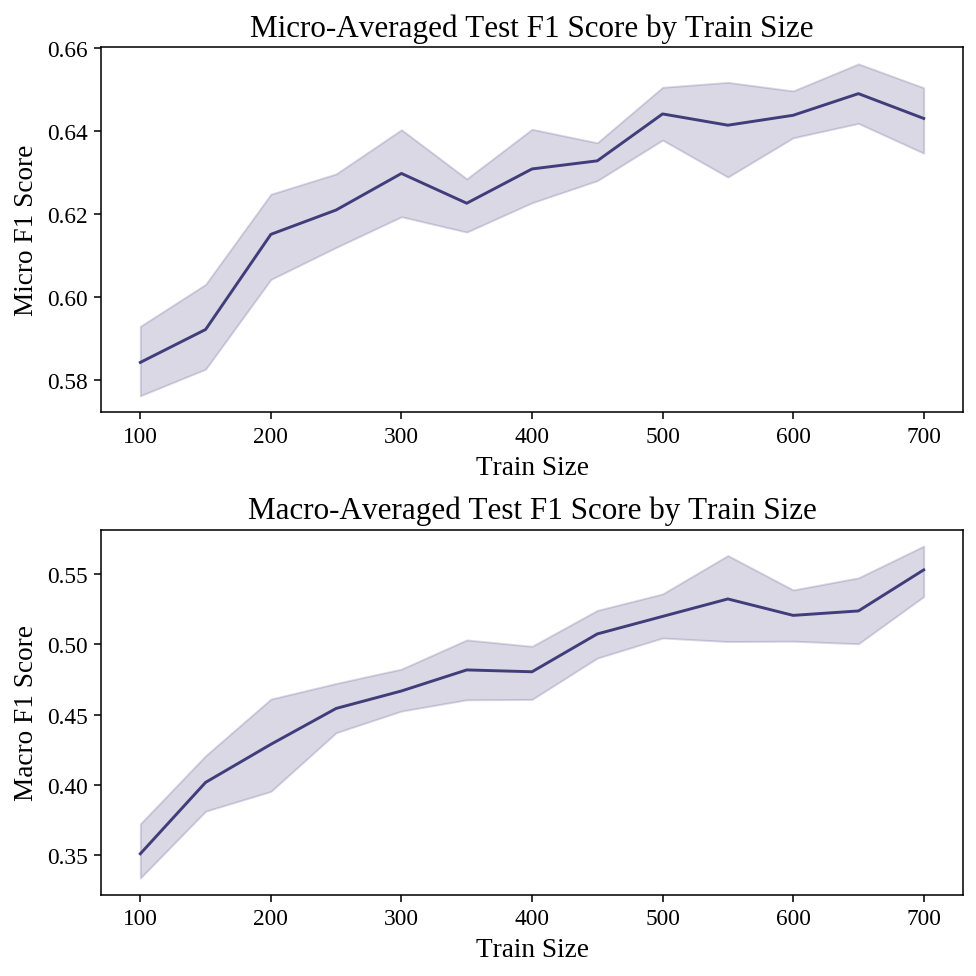

In [24]:
# Assuming log_df is your pandas DataFrame
# log_df = pd.read_csv('your_file.csv')  # Uncomment and modify if you're loading from a file

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=140, figsize=(7, 7))

# Using Seaborn's lineplot to plot the means and confidence intervals
sns.lineplot(
    x='train_size', 
    y='test_micro_f1', 
    data=log_df, 
    ax=ax1,
    color=col_list[1], 
    err_kws={
        "fc": col_list[1], 
        "edgecolor": col_list[1]
    }
)
ax1.set_title('Micro-Averaged Test F1 Score by Train Size', fontsize=16)
ax1.set_xlabel('Train Size', fontsize=14)
ax1.set_ylabel('Micro F1 Score', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

sns.lineplot(
    x='train_size', 
    y='test_macro_f1', 
    data=log_df, 
    ax=ax2, 
    color=col_list[1], 
    err_kws={
        "fc": col_list[1], 
        "edgecolor": col_list[1]
    }
)

ax2.set_title('Macro-Averaged Test F1 Score by Train Size', fontsize=16)
ax2.set_xlabel('Train Size', fontsize=14)
ax2.set_ylabel('Macro F1 Score', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout(pad=0.8)
plt.show()

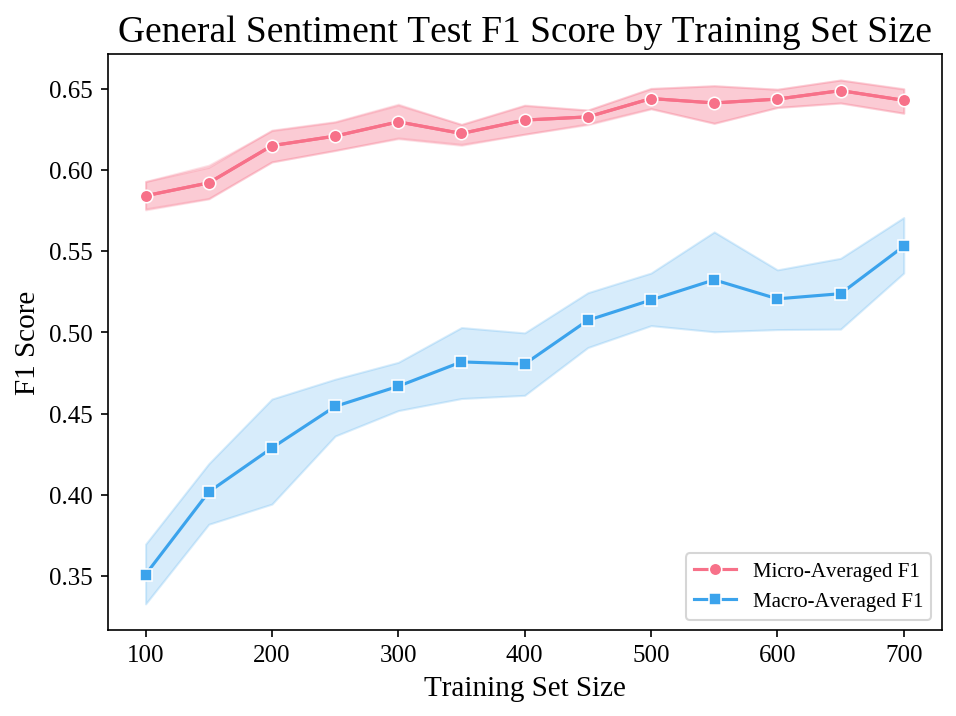

In [34]:
# Assuming log_df is your pandas DataFrame
# log_df = pd.read_csv('your_file.csv')  # Uncomment and modify if you're loading from a file

fig, ax = plt.subplots(1, 1, dpi=150) #, figsize=(7, 7))

# Using Seaborn's lineplot to plot the means and confidence intervals
sns.lineplot(
    x='train_size', 
    y='test_micro_f1', 
    data=log_df, 
    ax=ax,
    color=col_list[0], 
    err_kws={
        "fc": col_list[0], 
        "edgecolor": col_list[0]
    }
)
ax.set_title('General Sentiment Test F1 Score by Training Set Size', fontsize=18)
ax.set_xlabel('Training Set Size', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

var_list = ['test_micro_f1', 'test_macro_f1']#, 'test_auc']
var_name_list = ['Micro-Averaged F1', 'Macro-Averaged F1']#, 'Macro-Avg. AUC']
sel_col_list = [col_list[0], col_list[4]]
sel_marker_list = ['o', 's']

for sel_var, sel_var_name, sel_col, sel_marker in zip(var_list, var_name_list, sel_col_list, sel_marker_list):
    sns.lineplot(
        x='train_size', 
        y=sel_var,
        label=sel_var_name,
        data=log_df, 
        ax=ax, 
        color=sel_col,
        marker=sel_marker,
        err_kws={
            "fc": sel_col, 
            "edgecolor": sel_col
        }
    )

# ax2.set_title('Macro-Averaged Test F1 Score by Train Size', fontsize=16)
# ax2.set_xlabel('Train Size', fontsize=14)
# ax2.set_ylabel('Macro F1 Score', fontsize=14)
# ax2.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower right')
fig.tight_layout(pad=0.8)
plt.show()